In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the Motor_Vehicle_Collisions_-_Vehicles.csv
path = "/content/drive/MyDrive/Colab Notebooks/Motor_Vehicle_Collisions_-_Vehicles.csv"
df=pd.read_csv(path,low_memory=False)
my_dfs=df
#filtering the data from dec 2017 to nov 2019
my_dfs['CRASH_DATE'] = pd.to_datetime(my_dfs['CRASH_DATE'])
ts=pd.to_datetime('12/01/2017')
td=pd.to_datetime('11/30/2019')
my_dfs=my_dfs.loc[my_dfs.CRASH_DATE>ts,:]
my_dfs=my_dfs.loc[my_dfs.CRASH_DATE<td,:]


In [3]:
#clean data
import re
#creating new columns for year ,month name and month for future use
my_dfs['YEAR'],my_dfs['MONTH_NAME'],my_dfs['MONTH']=my_dfs['CRASH_DATE'].dt.year,my_dfs['CRASH_DATE'].dt.month_name(),my_dfs['CRASH_DATE'].dt.month

#drops only those rows who's 'VEHICLE_MAKE' data are empty
my_dfs=my_dfs.dropna(subset=['VEHICLE_MAKE'])


#=my_dfs['VEHICLE_MAKE'].map(lambda x: x.replace(x,re.search('\-.*',).start()))

# def Clean_vehical_names(vehical_name):
#   if re.search('\-.*',vehical_name):
#     replace_name=re.search('\-.*',vehical_name).start()
#     return vehical_name[:replace_name]
#   else:
#     return vehical_name
# my_dfs['VEHICLE_MAKE']=my_dfs['VEHICLE_MAKE'].apply(Clean_vehical_names)    

#apply() method takes each element in the VEHICLE_MAKE and applies the Clean_vehical_names() function on it.
#Clean_vehical_names funtion to clean the VEHICLE_MAKE column 
def Clean_vehical_names(vehical_name):
  expected = ['HOND', 'HINO', 'AUDI', 'LNDR']
  flag = False
  for i in expected:
    if (re.search(i, vehical_name)):
      flag = True
      break
  if flag:
    return i
  return '' 
my_dfs['VEHICLE_MAKE']=my_dfs['VEHICLE_MAKE'].apply(Clean_vehical_names)  

my_dfs=my_dfs[my_dfs['VEHICLE_MAKE'].str.contains('(HOND|LNDR|AUDI|HINO)').fillna(False)]
#filling the empty spaces with a value
my_dfs=my_dfs.fillna({'STATE_REGISTRATION':'unspecified',
                      'VEHICLE_MODEL':'unspecified',
                      'TRAVEL_DIRECTION':'unspecified',
                      'DRIVER_SEX':'unspecified',
                      'DRIVER_LICENSE_STATUS':'unspecified',
                      'DRIVER_LICENSE_JURISDICTION':'unspecified',
                      'PRE_CRASH':'unspecified',
                      'POINT_OF_IMPACT':'unspecified',
                      'VEHICLE_DAMAGE':'unspecified',
                      'VEHICLE_DAMAGE_1':'unspecified',
                      'VEHICLE_DAMAGE_2':'No Damage',
                      'VEHICLE_DAMAGE_3':'No Damage',
                      'PUBLIC_PROPERTY_DAMAGE':'unspecified',
                      'CONTRIBUTING_FACTOR_1':'unspecified',
                      'CONTRIBUTING_FACTOR_2':'unspecified'
                      })
#merging the similar catogories in VEHICLE_TYPE column(for the values given in the parameter file)
my_dfs.loc[my_dfs['VEHICLE_TYPE'].str.contains('sedan', case=False,na=False), 'VEHICLE_TYPE'] = 'Sedans'
my_dfs.loc[my_dfs['VEHICLE_TYPE'].str.contains('Truck', case=False,na=False), 'VEHICLE_TYPE'] = 'Truck'
my_dfs.loc[my_dfs['VEHICLE_TYPE'].str.contains('Van', case=False,na=False), 'VEHICLE_TYPE'] = 'Van'
my_dfs.loc[my_dfs['VEHICLE_TYPE'].str.contains('bike|SCOOT|Motorscooter|E-Sco|Moped|Motorcycle', case=False,na=False), 'VEHICLE_TYPE'] = 'Bike'
my_dfs.loc[my_dfs['VEHICLE_TYPE'].str.contains('Sport Utility Vehicle', case=False,na=False), 'VEHICLE_TYPE'] = 'Sport Utility Vehicle'
my_dfs.loc[my_dfs['VEHICLE_TYPE'].str.contains('pas', case=False,na=False), 'VEHICLE_TYPE'] = 'PASSENGER VEHICLE'
my_dfs.loc[my_dfs['VEHICLE_TYPE'].str.contains('Minicycle', case=False,na=False), 'VEHICLE_TYPE'] = 'Bicycle'

my_dfs=my_dfs.assign(VEHICLE_MAKE=my_dfs.VEHICLE_MAKE.ffill(),VEHICLE_OCCUPANTS=my_dfs.VEHICLE_OCCUPANTS.ffill(),VEHICLE_TYPE=my_dfs.VEHICLE_TYPE.ffill())
#my_dfs=my_dfs.drop(columns='PUBLIC_PROPERTY_DAMAGE_TYPE')

#my_dfs.to_csv('/content/drive/MyDrive/team50-V1.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


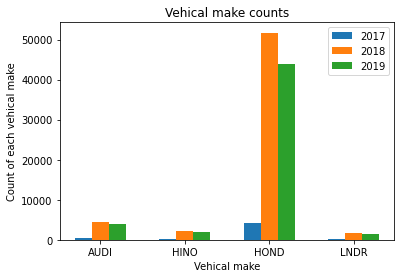

In [4]:
#function to filter the data based on Year passed as a parameter and return VEHICLE_MAKE(keys) and count of accidents() as a dictonary
def getYearData(year):
  return dict(my_dfs[(my_dfs['YEAR'] == year)][['YEAR', 'VEHICLE_MAKE']].groupby('VEHICLE_MAKE').count().YEAR)
var2017, var2018, var2019 = getYearData(2017), getYearData(2018), getYearData(2019)
#
labels=list(var2017.keys())
X_axis = 2*np.arange(len(labels))
plt.bar(X_axis -0.4,  list(var2017.values()), 0.4, label = '2017')
plt.bar(X_axis ,  list(var2018.values()), 0.4,label = '2018')
plt.bar(X_axis +0.4,  list(var2019.values()), 0.4, label = '2019')
plt.xticks(X_axis,labels)
plt.xlabel('Vehical make')
plt.ylabel('Count of each vehical make')
plt.title('Vehical make counts')
plt.legend()
plt.show()


In [5]:
"""#analysis query 1

vehical_makecount={'VEHICLE_MAKE':['HOND','LNDR','AUDI','HINO'],
        'Count':[my_dfs['VEHICLE_MAKE'].str.contains('HOND').sum(),
         my_dfs['VEHICLE_MAKE'].str.contains('LNDR').sum(),
         my_dfs['VEHICLE_MAKE'].str.contains('AUDI').sum(),
         my_dfs['VEHICLE_MAKE'].str.contains('HINO').sum()]}
analyse = pd.DataFrame(vehical_makecount)
analyse.plot.bar(x='VEHICLE_MAKE', y='Count')


def year_wise_data(vehicle,year):
  x=my_dfs[(my_dfs.VEHICLE_MAKE.str.contains(vehicle) & my_dfs['YEAR'].astype(str).str.contains(year))]
  return x
hond_2016=year_wise_data('HOND','2016')
hond_2017=year_wise_data('HOND','2017')
hond_2018=year_wise_data('HOND','2018')
lndr_2016=year_wise_data('LNDR','2016')
lndr_2017=year_wise_data('LNDR','2017')
lndr_2018=year_wise_data('LNDR','2018')
audi_2016=year_wise_data('AUDI','2016')
audi_2017=year_wise_data('AUDI','2017')
audi_2018=year_wise_data('AUDI','2018')
hino_2016=year_wise_data('HINO','2016')
hino_2017=year_wise_data('HINO','2017')
hino_2018=year_wise_data('HINO','2018')
X=['HOND','LNDR','AUDI','HINO']
x_2016=[len(hond_2016),len(lndr_2016),len(audi_2016),len(hino_2016)]
x_2017=[len(hond_2017),len(lndr_2017),len(audi_2017),len(hino_2017)]
x_2018=[len(hond_2018),len(lndr_2018),len(audi_2018),len(hino_2018)]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2,  x_2016, 0.4, 
	label = 'june 2016-dec 2016')
plt.bar(X_axis ,  x_2017, 0.4, 
	label = '2017')
plt.bar(X_axis + 0.2,  x_2018, 0.4, 
	label = 'jan 2018 - july 2018')
plt.xticks(X_axis, X)
plt.legend()
plt.show()



"""

"#analysis query 1\n\nvehical_makecount={'VEHICLE_MAKE':['HOND','LNDR','AUDI','HINO'],\n        'Count':[my_dfs['VEHICLE_MAKE'].str.contains('HOND').sum(),\n         my_dfs['VEHICLE_MAKE'].str.contains('LNDR').sum(),\n         my_dfs['VEHICLE_MAKE'].str.contains('AUDI').sum(),\n         my_dfs['VEHICLE_MAKE'].str.contains('HINO').sum()]}\nanalyse = pd.DataFrame(vehical_makecount)\nanalyse.plot.bar(x='VEHICLE_MAKE', y='Count')\n\n\ndef year_wise_data(vehicle,year):\n  x=my_dfs[(my_dfs.VEHICLE_MAKE.str.contains(vehicle) & my_dfs['YEAR'].astype(str).str.contains(year))]\n  return x\nhond_2016=year_wise_data('HOND','2016')\nhond_2017=year_wise_data('HOND','2017')\nhond_2018=year_wise_data('HOND','2018')\nlndr_2016=year_wise_data('LNDR','2016')\nlndr_2017=year_wise_data('LNDR','2017')\nlndr_2018=year_wise_data('LNDR','2018')\naudi_2016=year_wise_data('AUDI','2016')\naudi_2017=year_wise_data('AUDI','2017')\naudi_2018=year_wise_data('AUDI','2018')\nhino_2016=year_wise_data('HINO','2016')\nhin

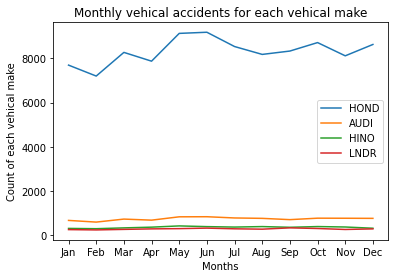

In [6]:
#analysis 2
import calendar
#creating a new dataframe by grouping the VEHICLE_MAKE and Month column from my_dfs dataframe and reset the index to defalut.
filtered_dfs=pd.DataFrame({'COUNT' : my_dfs.groupby( [ "VEHICLE_MAKE", "MONTH"] ).size()}).reset_index()

HOND=filtered_dfs[filtered_dfs['VEHICLE_MAKE'] == 'HOND']
AUDI=filtered_dfs[filtered_dfs['VEHICLE_MAKE'] == 'AUDI']
HINO=filtered_dfs[filtered_dfs['VEHICLE_MAKE'] == 'HINO']
LNDR=filtered_dfs[filtered_dfs['VEHICLE_MAKE'] == 'LNDR']
#ploting a line graph for each vehicle make given in the parameter file (for months on x axis and count of accidents on Y axis)
for frame in [HOND, AUDI, HINO, LNDR]:
    plt.plot(frame['MONTH'].apply(lambda y: calendar.month_abbr[y]), frame['COUNT'])
   
plt.xlabel('Months')
plt.ylabel('Count of each vehical make')
plt.title('Monthly vehical accidents for each vehical make')
plt.legend(['HOND', 'AUDI', 'HINO', 'LNDR'])
plt.show()




In [7]:
'''#analysis 3

expected_vehicle_type=['Sedans','Truck','Van','Bike','Bus','PASSENGER VEHICLE','Sport Utility Vehicle','Motorcycle','Bicycle','Taxi']

data=dict(my_dfs[['VEHICLE_TYPE','YEAR']].groupby('VEHICLE_TYPE').count().YEAR)

Y=list(data.values())
labels=list(data.keys())
plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
#only show the label with value greater than 10%
def pct(pct): 
    return ('%.2f' % pct) if pct > 10 else ''

#plot pie chart    
wedge = plt.pie(Y, autopct=pct, explode=None, shadow=False, startangle=10, 
         wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})

plt.title('')
plt.axis('equal')
plt.legend(labels,bbox_to_anchor=(2.0, 1.05))
plt.show()'''

'#analysis 3\n\nexpected_vehicle_type=[\'Sedans\',\'Truck\',\'Van\',\'Bike\',\'Bus\',\'PASSENGER VEHICLE\',\'Sport Utility Vehicle\',\'Motorcycle\',\'Bicycle\',\'Taxi\']\n\ndata=dict(my_dfs[[\'VEHICLE_TYPE\',\'YEAR\']].groupby(\'VEHICLE_TYPE\').count().YEAR)\n\nY=list(data.values())\nlabels=list(data.keys())\nplt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))\n#only show the label with value greater than 10%\ndef pct(pct): \n    return (\'%.2f\' % pct) if pct > 10 else \'\'\n\n#plot pie chart    \nwedge = plt.pie(Y, autopct=pct, explode=None, shadow=False, startangle=10, \n         wedgeprops={\'linewidth\': 0.5, \'edgecolor\': \'white\'})\n\nplt.title(\'\')\nplt.axis(\'equal\')\nplt.legend(labels,bbox_to_anchor=(2.0, 1.05))\nplt.show()'

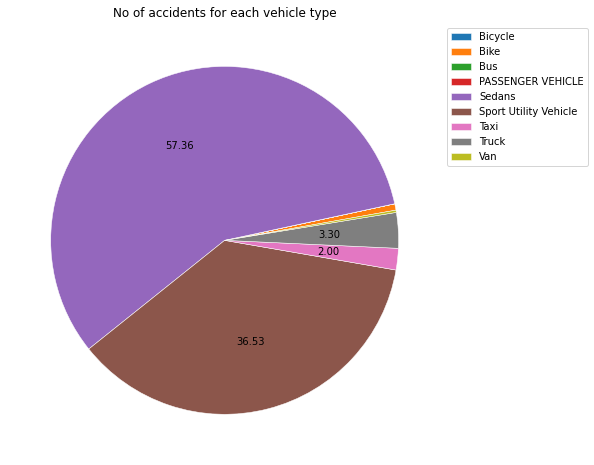

In [8]:
#expected_vehicle_type given in the parameter file
expected_vehicle_type=['Sedans','Truck','Van','Bike','Bus','PASSENGER VEHICLE','Sport Utility Vehicle','Motorcycle','Bicycle','Taxi']
data=my_dfs[my_dfs['VEHICLE_TYPE'].isin(expected_vehicle_type)]
data=dict(data[['VEHICLE_TYPE','YEAR']].groupby('VEHICLE_TYPE').count().YEAR)
#wedge sizes
Y=list(data.values())
#list of lables
labels=list(data.keys())
#increase the size of pie chart
plt.subplots(figsize=(8, 8))
def pct(pct): 
    return ('%.2f' % pct) if pct > 2 else '' #only show the label with value greater than 2%
#plot pie chart    
plt.pie(Y, autopct=pct, explode=None, shadow=False, startangle=10, 
         wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})
plt.title('No of accidents for each vehicle type')
#bbox_to_anchor is to set the position of labels
plt.legend(labels,bbox_to_anchor=(1, 1))
plt.show()